In [4]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=300

In [5]:
from keras.models import Sequential

from keras.layers import Dense, Activation, LSTM, Dropout
import keras
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

In [37]:
import mglearn
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression


In [51]:
def plot_feature_importances_data(model):
    n_features = data_gangleng.shape[1]
#     print(n_features)
    plt.barh(range(n_features),model.columns, align="center")
    plt.yticks(np.arange(n_features),data_gangleng.feature_names)
    plt.xlabel("특성중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    plt.show()
    

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
        data_gangleng.iloc[:,3:7],data_gangleng.iloc[:,8] , random_state=42)
gdrt= LinearRegression().fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(gdrt.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gdrt.score(X_test, y_test)))

훈련세트점수: 0.393
검증세트점수: 0.403


In [68]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(
        data_gangleng.iloc[:,3:7],data_gangleng.iloc[:,8] , random_state=42)
gdrt= Ridge(alpha=0.1).fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(gdrt.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gdrt.score(X_test, y_test)))

훈련세트점수: 0.393
검증세트점수: 0.403


In [71]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(
        data_gangleng.iloc[:,3:7],data_gangleng.iloc[:,8] , random_state=42)

gdrt= Lasso().fit(X_train,y_train)
print('훈련세트점수: {:.3f}'.format(gdrt.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gdrt.score(X_test, y_test)))


훈련세트점수: 0.372
검증세트점수: 0.375


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import utils
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
tf.set_random_seed(777)
from sklearn.externals import joblib

In [48]:
seq_len =365
result=[]
sequence_length = seq_len+1 # 51번째가 예측값
for index in range(len(data['평균 풍속(m/s)'])-sequence_length):
    result.append(data['평균 풍속(m/s)'][index:index+sequence_length])
print(len(result))
result =np.array(result)

16797


In [49]:
nomalized_data =[]
for window in result:
    nomalized_window = [(float(p) / 10) for p in window]
    nomalized_data.append(nomalized_window)
result = np.array(nomalized_data)
result

array([[0.174     , 0.55      , 0.242     , ..., 0.225     , 0.225     ,
        0.092     ],
       [0.55      , 0.242     , 0.116     , ..., 0.225     , 0.092     ,
        0.09      ],
       [0.242     , 0.116     , 0.138     , ..., 0.092     , 0.09      ,
        0.074     ],
       ...,
       [0.47857143, 0.40285714, 0.34714286, ..., 0.50428571, 0.16714286,
        0.30714286],
       [0.40285714, 0.34714286, 0.47428571, ..., 0.16714286, 0.30714286,
        0.39428571],
       [0.34714286, 0.47428571, 0.44571429, ..., 0.30714286, 0.39428571,
        0.72428571]])

In [50]:
row=int(result.shape[0]*0.8)
X_train = result[:row,:365]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
y_train = result[:row,-1]
X_test = result[row:,:365]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
y_test = result[row:,-1]
X_train.shape, X_test.shape

((13437, 365, 1), (3360, 365, 1))

In [51]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(128,input_shape=(365,1),return_sequences=True)) 
# 시계열 데이터에서는 LSTM을 사용한다
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1, activation='linear')) # 답은 하나기 때문 Dense를 사용
model.compile('Adam','mse')
# 단계별로 예측 rmsprop
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 365, 128)          66560     
_________________________________________________________________
lstm_34 (LSTM)               (None, 365, 64)           49408     
_________________________________________________________________
lstm_35 (LSTM)               (None, 365, 64)           33024     
_________________________________________________________________
lstm_36 (LSTM)               (None, 365, 64)           33024     
_________________________________________________________________
lstm_37 (LSTM)               (None, 365, 64)           33024     
_________________________________________________________________
lstm_38 (LSTM)               (None, 365, 64)           33024     
_________________________________________________________________
lstm_39 (LSTM)               (None, 64)               

In [52]:
hist = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 13437 samples, validate on 3360 samples
Epoch 1/5
13437/13437 [==============================] - 739s 55ms/step - loss: 0.0372 - val_loss: 0.0210
Epoch 2/5
13437/13437 [==============================] - 1065s 79ms/step - loss: 0.0359 - val_loss: 0.0171
Epoch 3/5
13437/13437 [==============================] - 1100s 82ms/step - loss: 0.0354 - val_loss: 0.0164
Epoch 4/5
13437/13437 [==============================] - 938s 70ms/step - loss: 0.0353 - val_loss: 0.0163
Epoch 5/5
13437/13437 [==============================] - 1164s 87ms/step - loss: 0.0352 - val_loss: 0.0177


In [45]:
pred = model.predict(X_test)

In [40]:
model.save('../data/dd/model_강원도_평균기온.h5')

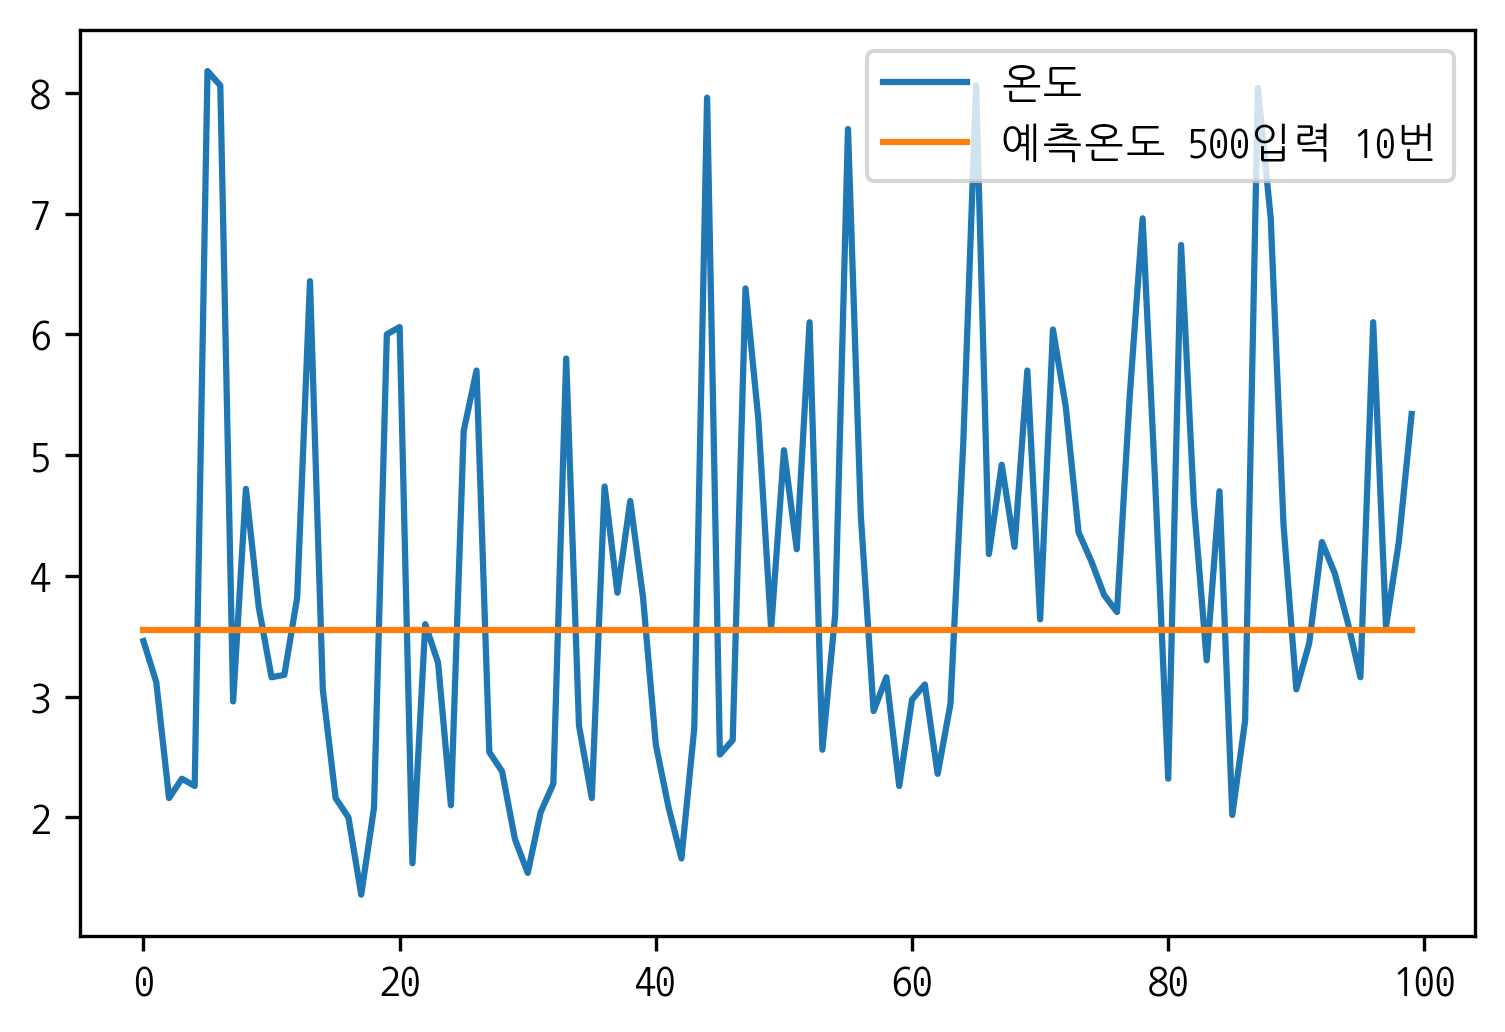

In [46]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='온도')
ax.plot(pred[:100],label="예측온도 500입력 10번")
plt.legend()
plt.show()

In [63]:
from keras.models import load_model

model.save('data_gangleng.h5')

In [57]:
model = load_model('model1.h5')

In [107]:
n_data_gl[0][5]

array([23.8])

In [30]:
pred = model.predict(X_test)
pred[1]

array([16.428677], dtype=float32)

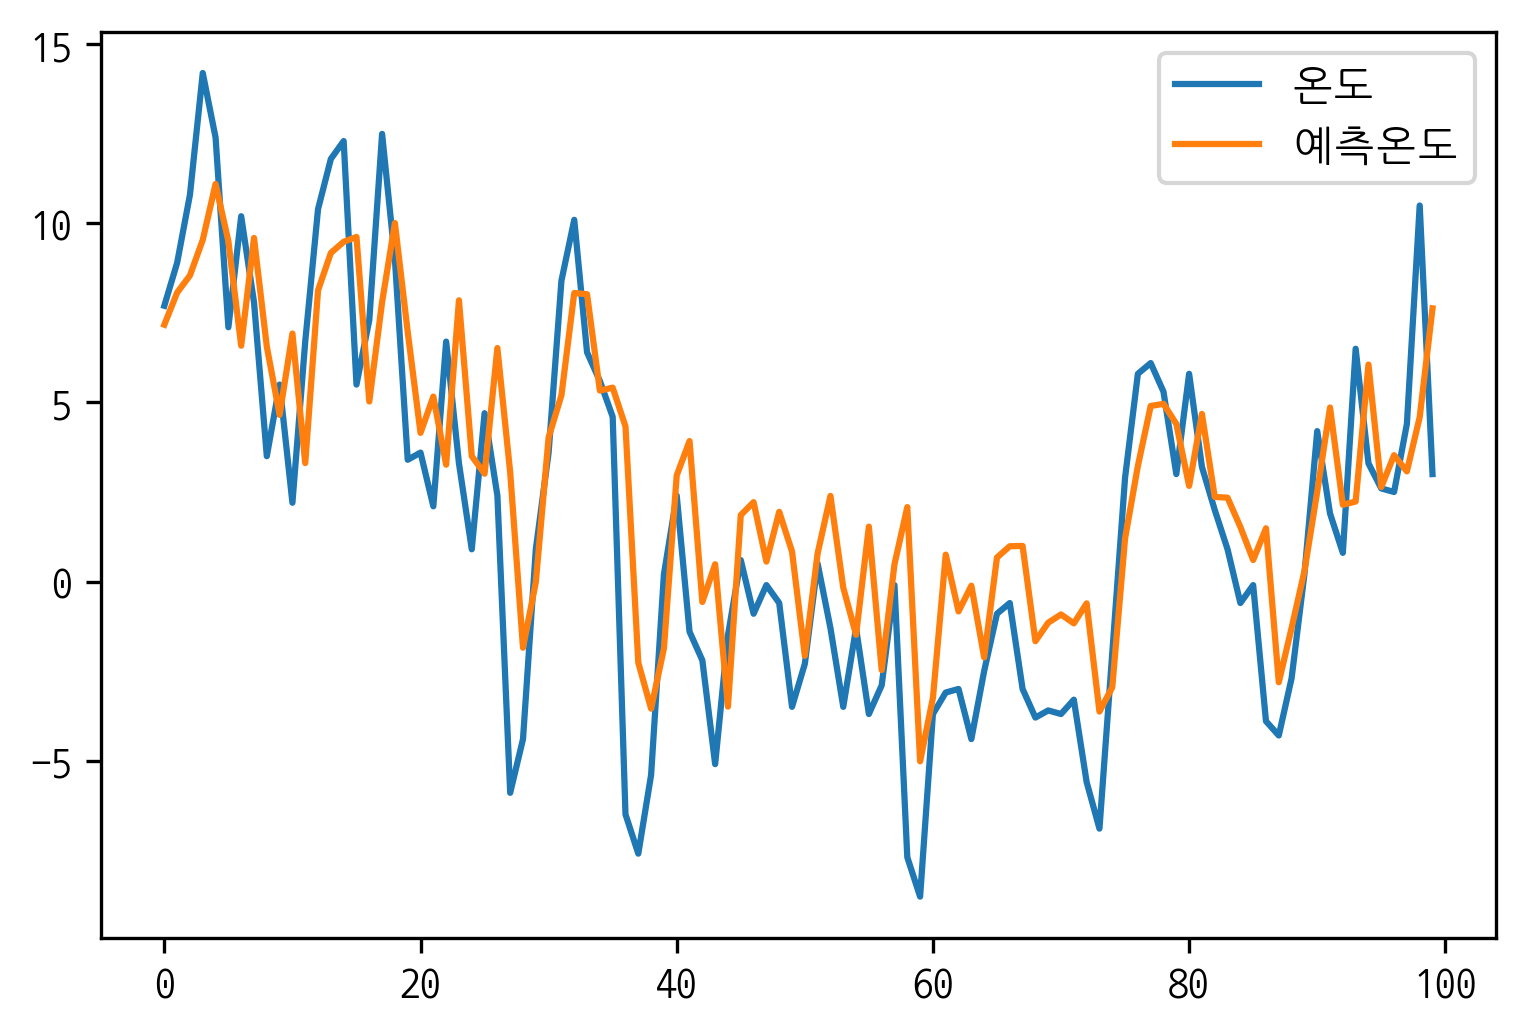

In [100]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='온도')
ax.plot(pred[:100],label="예측온도 500입력 10번")
plt.legend()
plt.show()

In [ ]:
df[df['지점명']=='관악산']

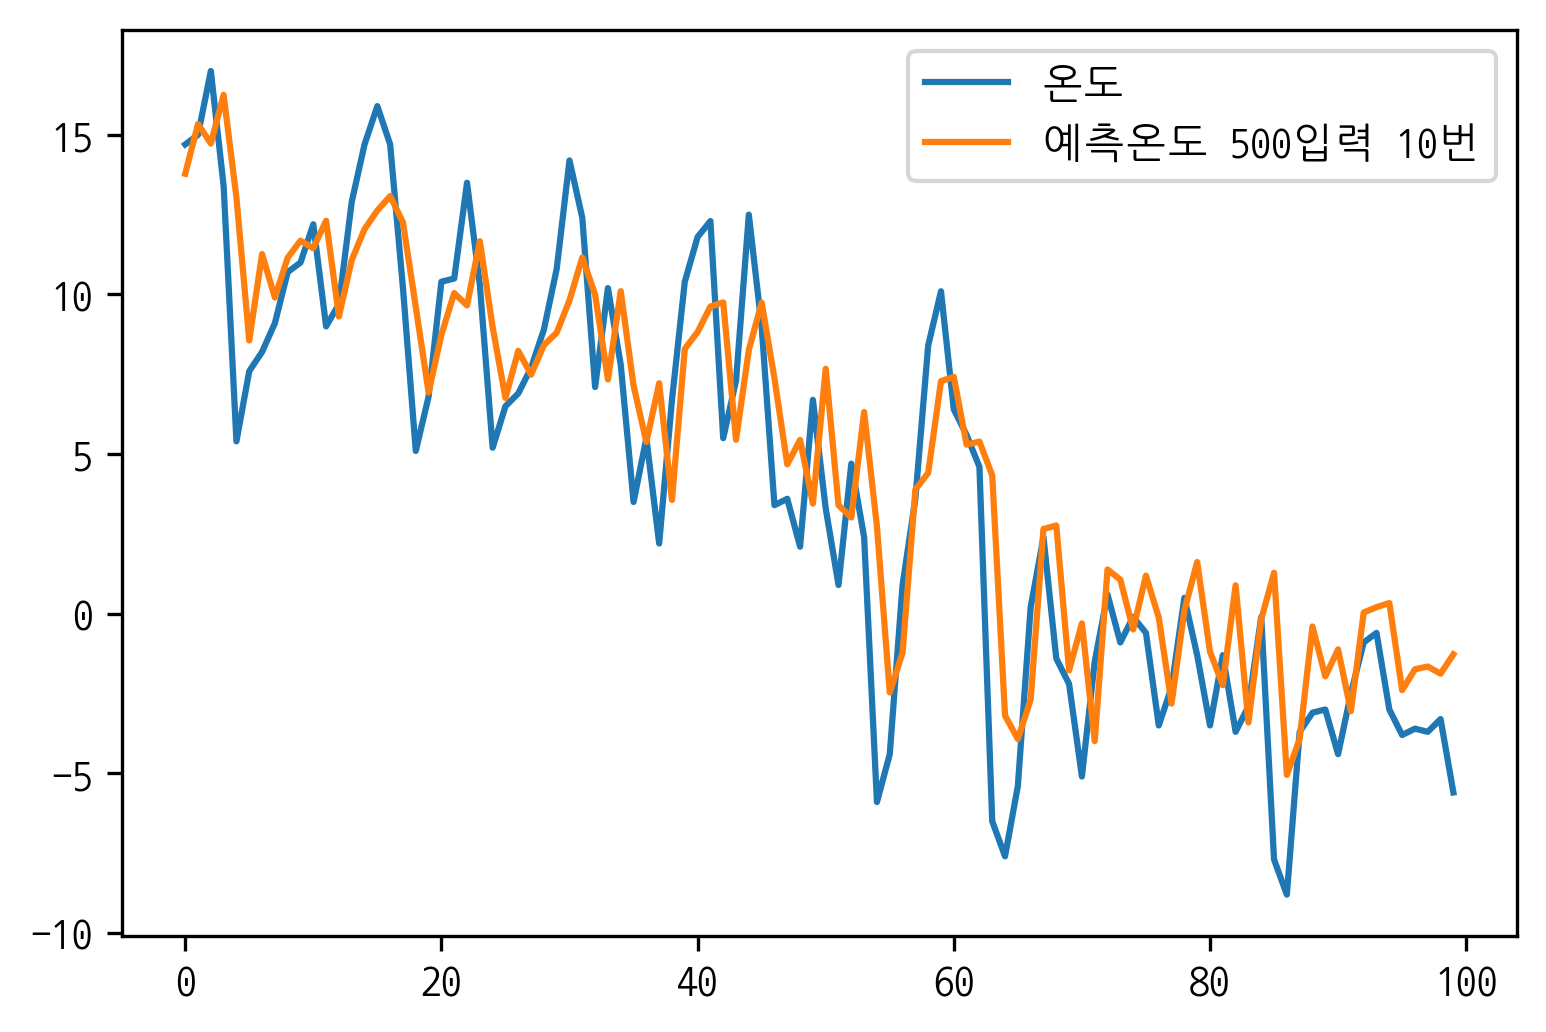

In [22]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='온도')
ax.plot(pred[:100],label="예측온도 365입력 5번 50개 3개층")
plt.legend()
plt.show()

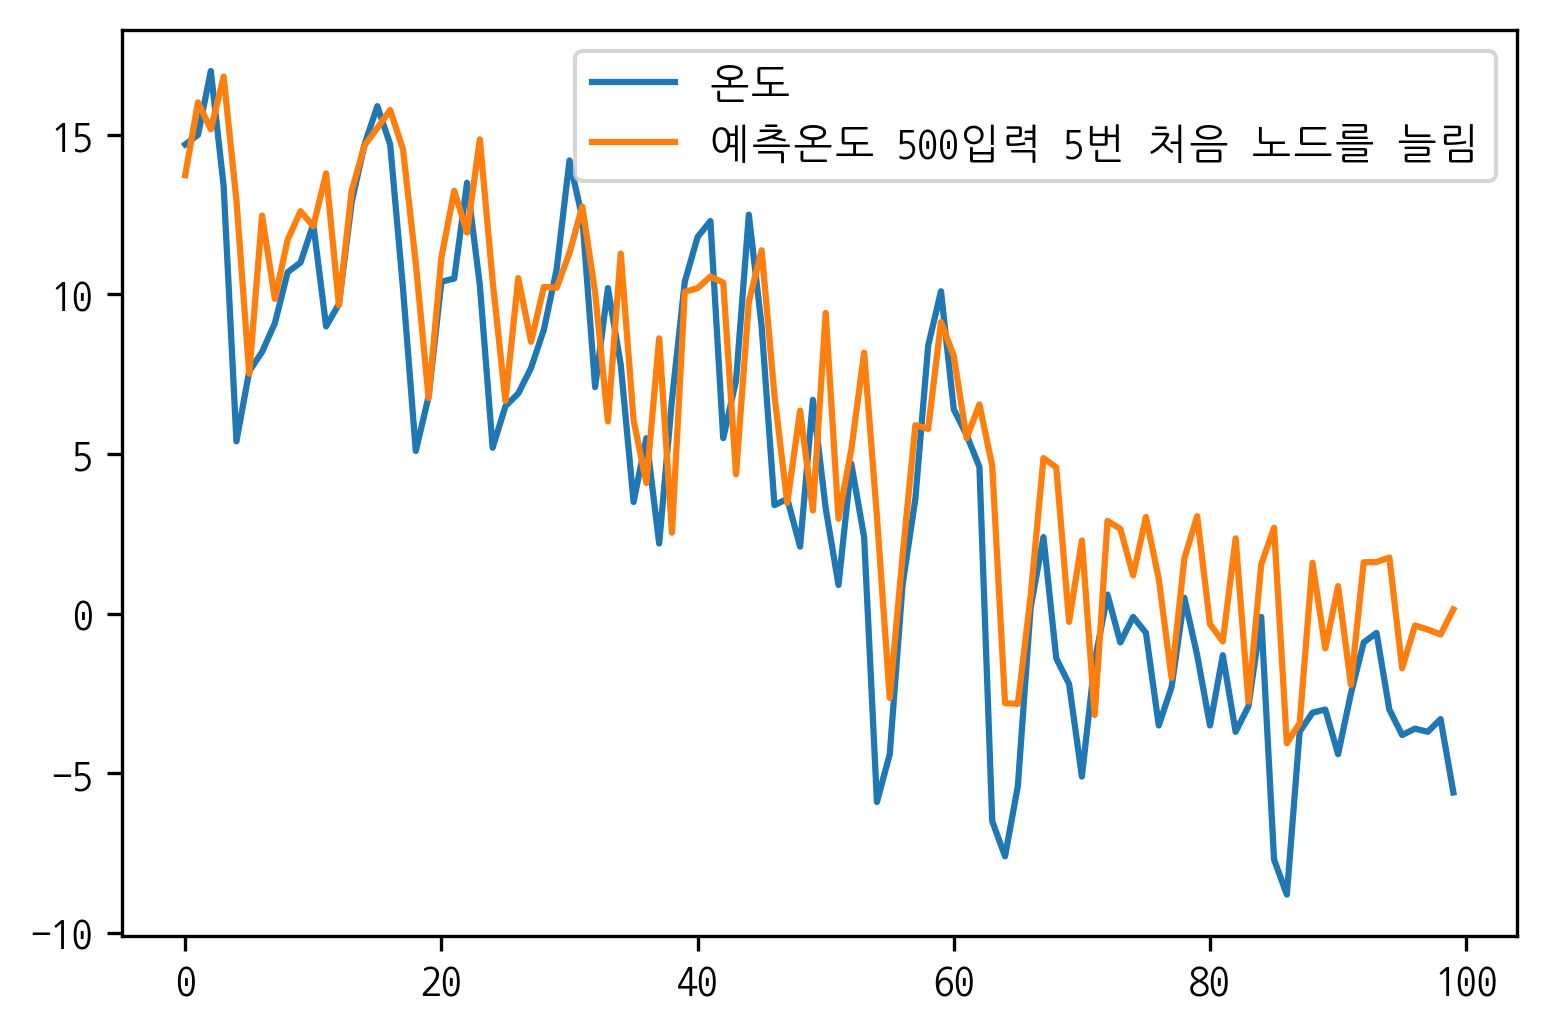

In [26]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='온도')
ax.plot(pred[:100],label="예측온도 500입력 5번 처음 128노드를 늘림")
plt.legend()
plt.show()

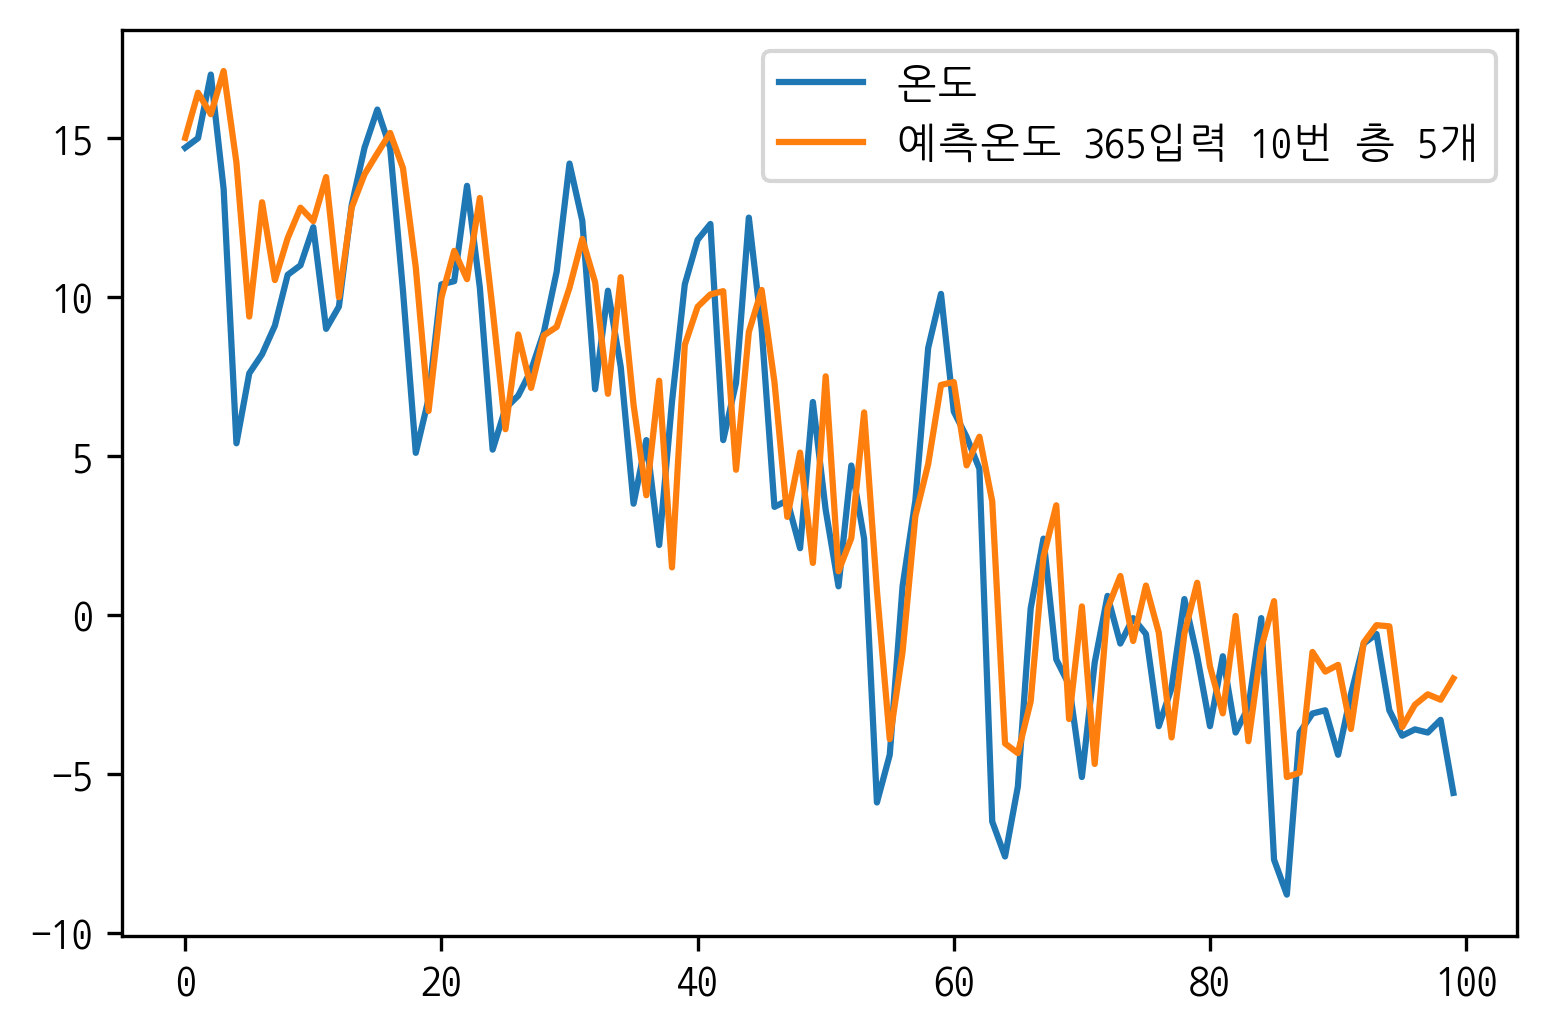

In [31]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='온도')
ax.plot(pred[:100],label="예측온도 365입력 10번 층 5개")
plt.legend()
plt.show()

In [18]:
ef_mean=pd.read_csv('../data/dd/ef_mean.csv') 
ef_mean.head()

,Unnamed: 0,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 현지기압(hPa),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2)
0,0,강원도,1972-01-01,-4.4,-9.2,-1.6,0.0,4.5,2.9,923.6,74.3,8.1,9.64
1,1,강원도,1972-01-02,-8.1,-15.3,-0.9,0.0,4.0,1.8,928.3,74.5,8.3,10.65
2,2,강원도,1972-01-03,-5.5,-14.4,0.0,0.0,5.5,3.0,931.0,58.0,6.7,8.04
3,3,강원도,1972-01-04,-1.0,-3.9,1.0,6.7,5.5,1.3,926.8,83.8,0.0,1.07
4,4,강원도,1972-01-05,-1.7,-4.0,1.0,4.9,6.0,2.4,930.0,90.5,3.3,5.02


In [19]:
data=ef_mean[ef_mean['지역']=='전라남도']
data.shape

(17163, 13)

In [694]:
seq_len =90
result=[]
sequence_length = seq_len+1 # 51번째가 예측값
for index in range(len(data['합계 일사량(MJ/m2)'])-(sequence_length)):
    result.append(data['합계 일사량(MJ/m2)'][index:index+sequence_length])
print(len(result))
result =np.array(result)
result

17072


array([[ 5.444     , 11.18      , 12.798     , ..., 33.48333333,
        28.02      , 22.334     ],
       [11.18      , 12.798     , 13.226     , ..., 28.02      ,
        22.334     , 25.366     ],
       [12.798     , 13.226     , 10.428     , ..., 22.334     ,
        25.366     , 24.742     ],
       ...,
       [13.75857143,  1.85428571,  1.41      , ...,  9.2       ,
        11.63571429,  2.94285714],
       [ 1.85428571,  1.41      , 13.78285714, ..., 11.63571429,
         2.94285714,  5.18857143],
       [ 1.41      , 13.78285714, 17.06      , ...,  2.94285714,
         5.18857143, 11.14857143]])

In [596]:
nomalized_data =[]
for window in result:
    # 첫번째 값을 0으로 설정, 즉 자기 자신/ 자기자신-1=0
    # 두번째 값은 두번째 값/ 첫번째 값 -1 = 결과값
    # 계속 진행하면 결과는 정규화된 값을 얻을 수 있다.
    nomalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    nomalized_data.append(nomalized_window)
result = np.array(nomalized_data)
result

array([[ 0.        ,  0.06869821,  0.05399626, ..., -0.12946627,
        -0.03011672, -0.04637797],
       [ 0.        , -0.01375688,  0.01725863, ..., -0.0924629 ,
        -0.10767884, -0.13031516],
       [ 0.        ,  0.03144814, -0.0778595 , ..., -0.09523206,
        -0.11818412, -0.1683997 ],
       ...,
       [ 0.        ,  0.11660711,  0.20801204, ..., -0.27684785,
        -0.22136543,  0.0344179 ],
       [ 0.        ,  0.08185953,  0.10779855, ..., -0.30267812,
        -0.0736062 , -0.03638201],
       [ 0.        ,  0.02397634,  0.02101822, ..., -0.14370232,
        -0.10929472, -0.42955005]])

In [695]:
row=int(result.shape[0]*0.8)
X_train = result[:row,:90]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
y_train = result[:row,-1]
X_test = result[row:,:90]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
y_test = result[row:,-1]
X_train.shape, X_test.shape

((13657, 90, 1), (3415, 90, 1))

In [696]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(50,input_shape=(90,1),return_sequences=True)) # 시계열 데이터에서는 LSTM을 사용한다
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1, activation='linear')) # 답은 하나기 때문 Dense를 사용
model.compile('Adam','mse',)
# 단계별로 예측 rmsprop
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 90, 50)            10400     
_________________________________________________________________
lstm_82 (LSTM)               (None, 90, 64)            29440     
_________________________________________________________________
lstm_83 (LSTM)               (None, 90, 64)            33024     
_________________________________________________________________
lstm_84 (LSTM)               (None, 90, 64)            33024     
_________________________________________________________________
lstm_85 (LSTM)               (None, 90, 64)            33024     
_________________________________________________________________
lstm_86 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_16 (Dense)             (None, 1)               

In [697]:
hist = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Train on 13657 samples, validate on 3415 samples
Epoch 1/3
13657/13657 [==============================] - 201s 15ms/step - loss: 90.9986 - val_loss: 34.2604
Epoch 2/3
13657/13657 [==============================] - 195s 14ms/step - loss: 61.4967 - val_loss: 34.0866
Epoch 3/3
13657/13657 [==============================] - 205s 15ms/step - loss: 56.9323 - val_loss: 33.9704


In [743]:
pred = model.predict(X_test)
# 예측온도 80입력 10번 층 3개
# 예측 습도 365(1년치) 입력 3번 층 4개 + 데이터 정제

In [744]:
n_data_gl = data['합계 일사량(MJ/m2)'].iloc[-90:]#/data['평균 상대습도(%)'].iloc[-90])-1

n_data_gl  = np.array(n_data_gl).reshape(1,90,1)
model.predict(n_data_gl)
print(float(model.predict(n_data_gl)))
n = float(model.predict(n_data_gl))

print(data['합계 일사량(MJ/m2)'].iloc[-90])
k=list(data['합계 일사량(MJ/m2)'])


array([[7.0175047]], dtype=float32)

In [ ]:
# 정제하지 않앗을 경우
k=list(k)
k.append(n)
k = np.array(k)

In [755]:
n_data_gl = k[-90:]
n_data_gl  = np.array(n_data_gl).reshape(1,90,1)
print(float(model.predict(n_data_gl)))
n = float(model.predict(n_data_gl))
print(k['합계 일사량(MJ/m2)'].iloc[-90])


In [756]:
model.predict(k[-90:].reshape(1,90,1))

array([[7.017269]], dtype=float32)

In [734]:
# 정제했을 경우
n = float(model.predict(k[-90:].reshape(1,90,1)))
k=list(data['합계 일사량(MJ/m2)'])
k.append(n)
k = np.array(k)

AttributeError: 'list' object has no attribute 'reshape'

In [732]:
a = float((n+1)*data['합계 일사량(MJ/m2)'].iloc[-90])
print("예측값",a)
k=list(data['합계 일사량(MJ/m2)'])
k.append(a)



예측값 136.7786300468445


In [614]:
k[-365]

57.01428571428572

In [691]:
# a/data['평균 상대습도(%)'].iloc[-100]=2.31
# a
n_data_gl = (k[-120:]/k[-90])-1
n_data_gl = np.array(n_data_gl).reshape(1,90,1)
n = float(model.predict(n_data_gl))
print('예측 지수 : ',n)
k = list(k)
ss = float((n+1)*k[-90])
print(ss)
k.append(ss)
k = np.array(k)



예측 지수 :  -0.10534940659999847
60.989609024354394


In [692]:
k[-365]

64.74285714285715

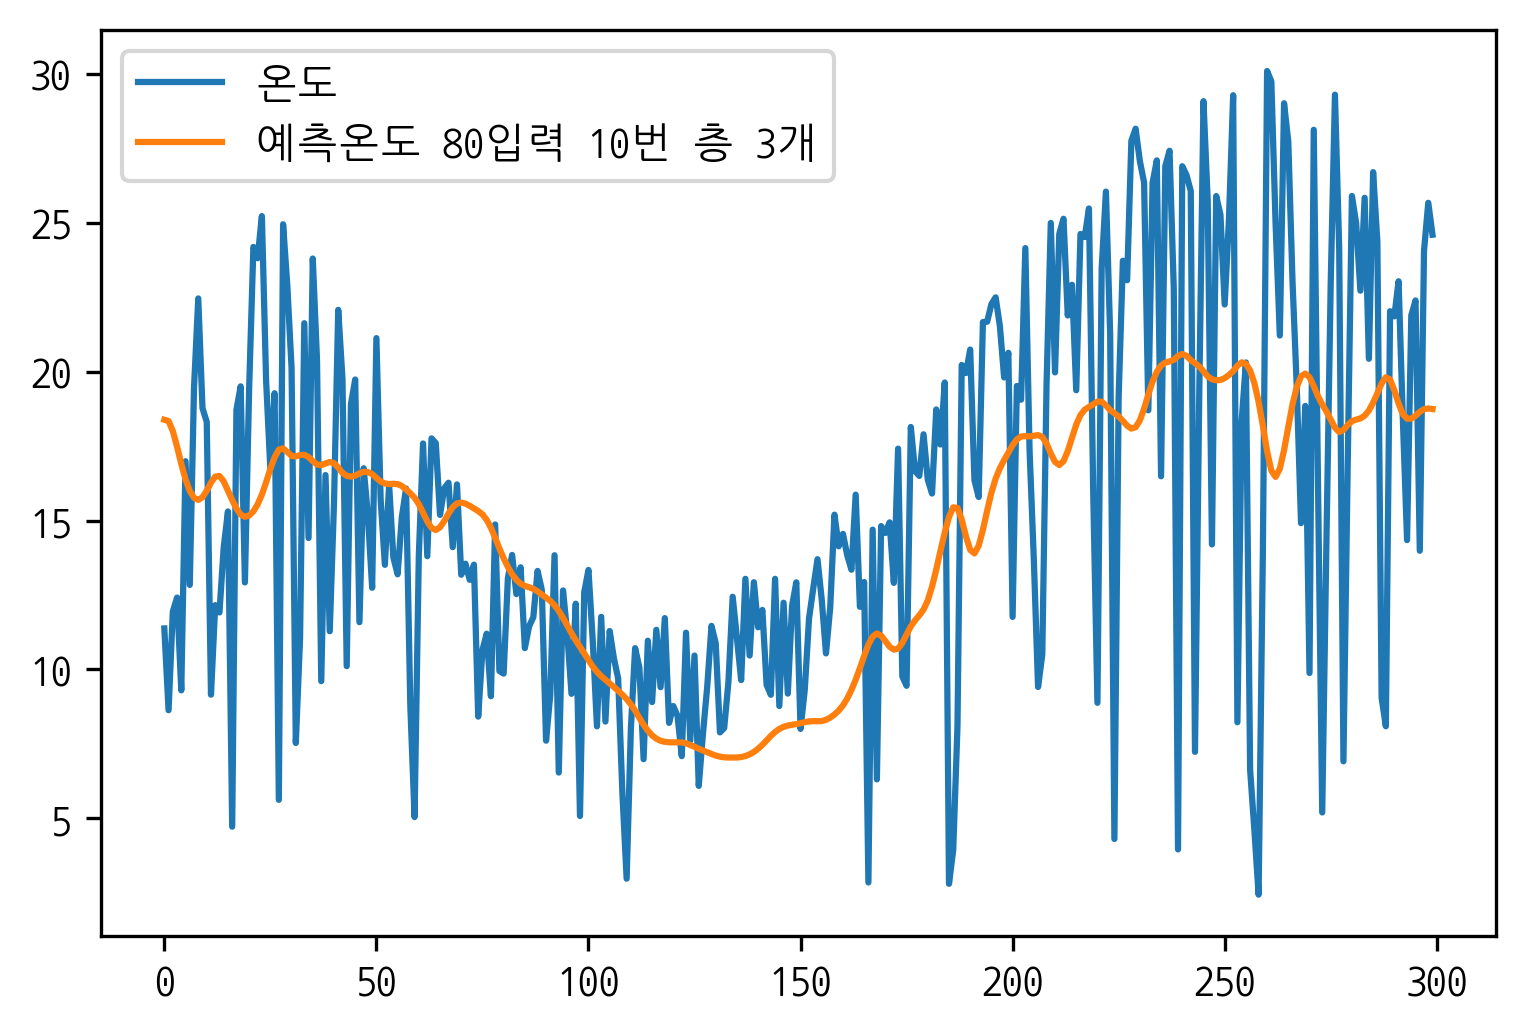

In [699]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:300],label='온도')
ax.plot(pred[:300],label="예측온도 80입력 10번 층 3개")
plt.legend()
plt.show()

In [6]:
ef_mean1=pd.read_csv('../data/dd/thisweather.csv') 
ef_mean2=pd.read_csv('../data/dd/2020data.csv')
ef_mean1.shape, ef_mean2.shape


((245646, 13), (2361, 13))

In [11]:
ef_mean2['평균 상대습도(%)'].head(10)

0    64.353846
1    68.184615
2    56.664286
3    56.478571
4    62.723077
5    73.585714
6    96.900000
7    85.261538
8    68.269231
9    68.085714
Name: 평균 상대습도(%), dtype: float64

In [14]:
ef_mean1[ef_mean1['지역']=='강원도']

17521    80.985714
17522    78.014286
17523    63.900000
17524    70.900000
17525    55.314286
17526    61.728571
17527    68.828571
17528    72.700000
17529    42.466667
17530    69.000000
Name: 평균 상대습도(%), dtype: float64

In [ ]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
import re
import datetime
import random
import pymysql

In [1]:
conn = pymysql.connect(host='localhost',port=3306,user='root',passwd='12345',\
                       db='pyweb',charset='utf8')
curs = conn.cursor()
conn.commit()

f = open('insert.csv','r')
csvReader = csv.reader(f)


NameError: name 'pymysql' is not defined

In [ ]:
for i in data_gangleng:    
    sql = """insert into tablename ('지점','지점명','일시','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 풍속(m/s)','평균 풍속(m/s)','평균 현지기압(hPa)','합계 일조시간(hr)') \
               values (%.f,%.f,%.f,%.f,%.f,%.f,%.f,%.f,%.f,%.f,%.f,%.f) """% (i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10])
    curs.execute(sql)

    
conn.commit()
f.close()

conn.close()